<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#一-导包和读取文件" data-toc-modified-id="一-导包和读取文件-1">一 导包和读取文件</a></span><ul class="toc-item"><li><span><a href="#0-过滤数据w" data-toc-modified-id="0-过滤数据w-1.1">0 过滤数据w</a></span></li><li><span><a href="#1-切换特征f" data-toc-modified-id="1-切换特征f-1.2">1 切换特征f</a></span></li><li><span><a href="#2-过采样" data-toc-modified-id="2-过采样-1.3">2 过采样</a></span></li><li><span><a href="#3-欠采样" data-toc-modified-id="3-欠采样-1.4">3 欠采样</a></span></li></ul></li><li><span><a href="#二-数据均衡实验" data-toc-modified-id="二-数据均衡实验-2">二 数据均衡实验</a></span><ul class="toc-item"><li><span><a href="#1-原始" data-toc-modified-id="1-原始-2.1">1 原始</a></span></li><li><span><a href="#2-class-weight" data-toc-modified-id="2-class-weight-2.2">2 class weight</a></span></li><li><span><a href="#3-欠采样" data-toc-modified-id="3-欠采样-2.3">3 欠采样</a></span></li><li><span><a href="#4-过采样" data-toc-modified-id="4-过采样-2.4">4 过采样</a></span></li></ul></li><li><span><a href="#三-减少特征" data-toc-modified-id="三-减少特征-3">三 减少特征</a></span></li><li><span><a href="#四-分割" data-toc-modified-id="四-分割-4">四 分割</a></span><ul class="toc-item"><li><span><a href="#1-先尝试对过滤后的#15结冰数据进行聚类" data-toc-modified-id="1-先尝试对过滤后的#15结冰数据进行聚类-4.1">1 先尝试对过滤后的#15结冰数据进行聚类</a></span></li><li><span><a href="#2-树模型看节点" data-toc-modified-id="2-树模型看节点-4.2">2 树模型看节点</a></span></li><li><span><a href="#3-三个标签" data-toc-modified-id="3-三个标签-4.3">3 三个标签</a></span><ul class="toc-item"><li><span><a href="#（1）精选图" data-toc-modified-id="（1）精选图-4.3.1">（1）精选图</a></span></li><li><span><a href="#（2）粗略全看" data-toc-modified-id="（2）粗略全看-4.3.2">（2）粗略全看</a></span></li></ul></li></ul></li><li><span><a href="#五-效果" data-toc-modified-id="五-效果-5">五 效果</a></span><ul class="toc-item"><li><span><a href="#1-分别得分：强过滤、确定特征、欠采样、分割条件" data-toc-modified-id="1-分别得分：强过滤、确定特征、欠采样、分割条件-5.1">1 分别得分：强过滤、确定特征、欠采样、分割条件</a></span><ul class="toc-item"><li><span><a href="#（1）svr训练测试" data-toc-modified-id="（1）svr训练测试-5.1.1">（1）svr训练测试</a></span></li><li><span><a href="#（2）slt训练测试" data-toc-modified-id="（2）slt训练测试-5.1.2">（2）slt训练测试</a></span></li><li><span><a href="#（3）作差" data-toc-modified-id="（3）作差-5.1.3">（3）作差</a></span></li></ul></li><li><span><a href="#2-合并过滤后两个模型的得分" data-toc-modified-id="2-合并过滤后两个模型的得分-5.2">2 合并过滤后两个模型的得分</a></span></li><li><span><a href="#2-合并过滤后两个模型的得分+强规则得分" data-toc-modified-id="2-合并过滤后两个模型的得分+强规则得分-5.3">2 合并过滤后两个模型的得分+强规则得分</a></span></li></ul></li></ul></div>

# 一 导包和读取文件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

plt.rcParams['font.family']=['Songti SC']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 200

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=100, suppress=True)

In [2]:
# 读入文件
new15 = pd.read_csv("../data/15.csv",index_col=0).round(2)
new21 = pd.read_csv("../data/21.csv",index_col=0).round(2)
new15_under = pd.read_csv("../data/15_under.csv",index_col=0).round(2)

In [3]:
feature_selected = ['environment_tmp', 'int_tmp','yaw_speed','wind_speed','pitch3_moto_tmp','pitch1_moto_tmp','pitch2_moto_tmp',
'power','pitch1_angle','pitch3_angle','pitch2_angle','generator_speed']
feature_gen = ['wind_speed.div.power', 'power.div.generator_speed','generator_speed.div.wind', 'mean_pitch_angle', 'tmp_diff']
feature_all = new15_under.columns.to_list()

In [4]:
feature_use = feature_selected + feature_gen

In [5]:
len(feature_use)

17

In [6]:
len(feature_gen)

5

In [7]:
new15.label.value_counts()

0    350029
1     23667
Name: label, dtype: int64

## 0 过滤数据w

In [8]:
new15w = new15[(new15['power']<=2) & (new15['environment_tmp']<=2)]

X,y = new15w.drop(columns=['label']), new15w["label"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
len(X.columns)

31

In [10]:
new15w.label.value_counts()

0    330894
1     23667
Name: label, dtype: int64

## 1 切换特征f

In [11]:
new15f = new15[feature_selected + feature_gen+['label']]

In [12]:
new15fw = new15f[(new15f['power']<=2) & (new15f['environment_tmp']<=2)]

In [13]:
Xf,yf = new15fw.drop(columns=['label']), new15fw["label"]
Xf_train,Xf_test,yf_train,yf_test = train_test_split(Xf,yf,test_size=0.3,random_state=0)

## 2 过采样

In [14]:
sm = SMOTE(random_state=0)
X_over, y_over = sm.fit_resample(X, y)
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X_over,y_over,test_size=0.3,random_state=0)

## 3 欠采样

In [15]:
rus = RandomUnderSampler(random_state=0)
X_under, y_under = rus.fit_sample(X, y)
X_train_under,X_test_under,y_train_under,y_test_under = train_test_split(X_under,y_under,test_size=0.3,random_state=0)

In [16]:
Counter(y_under)

Counter({0: 23667, 1: 23667})

# 二 数据均衡实验

In [17]:
names = ["Nearest Neighbors",
"Logistic Regression", 
"Decision Tree"
]

classifiers = [
    KNeighborsClassifier(n_jobs=-1,n_neighbors=3),
    LogisticRegression(n_jobs=-1,random_state=0), 
    DecisionTreeClassifier(random_state=0)
]

classifiers2 = [
    KNeighborsClassifier(n_jobs=-1,n_neighbors=3),
    LogisticRegression(n_jobs=-1,random_state=0), 
    DecisionTreeClassifier(random_state=0)
]

classifiers_balance = [
    KNeighborsClassifier(n_jobs=-1,n_neighbors=3),
    LogisticRegression(n_jobs=-1,random_state=0,class_weight='balanced'), 
    DecisionTreeClassifier(random_state=0,class_weight='balanced')
]

In [18]:
def cal_scores(names, classifiers,X_train, y_train,X_test,y_test):
    scores = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1-measure','AUC','Train time(s)','Test time(s)'], index=names)
    for name, clf in zip(names, classifiers):
        time1 = time.time()
        clf.fit(X_train, y_train)
        time2 = time.time()
        y_pred = clf.predict(X_test)
        time3 = time.time()

        scores.at[name,'Accuracy'] = accuracy_score(y_test, y_pred)
        scores.at[name,'Precision'] = precision_score(y_test, y_pred)
        scores.at[name,'Recall'] = recall_score(y_test, y_pred)
        scores.at[name,'F1-measure'] = f1_score(y_test, y_pred)
        scores.at[name,'AUC'] = roc_auc_score(y_test, y_pred)

        scores.at[name,'Train time(s)'] = time2 - time1
        scores.at[name,'Test time(s)'] = time3 - time2

    return scores

In [19]:
def exp(X_train,X_test,y_train,y_test,names, classifiers):
    return cal_scores(names, classifiers,X_train, y_train,X_test,y_test)

## 1 原始 

In [20]:
score = exp(X_train,X_test,y_train,y_test, names, classifiers)

In [21]:
score

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.995,0.973,0.947,0.960,0.973,1.636,32.137
Logistic Regression,0.950,0.708,0.448,0.549,0.717,17.327,0.009
Decision Tree,0.999,0.992,0.993,0.993,0.996,4.617,0.026


## 2 class weight

In [22]:
score_balance = exp(X_train,X_test,y_train,y_test, names, classifiers_balance)

In [23]:
score_balance

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.995,0.973,0.947,0.960,0.973,1.443,29.758
Logistic Regression,0.868,0.320,0.845,0.464,0.858,18.754,0.007
Decision Tree,1.000,0.996,0.997,0.996,0.998,4.641,0.024


In [24]:
score_balance - score

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.000,0.000,0.000,0.000,0.000,-0.193,-2.379
Logistic Regression,-0.082,-0.388,0.397,-0.085,0.140,1.427,-0.002
Decision Tree,0.000,0.003,0.003,0.003,0.002,0.024,-0.002


## 3 欠采样

In [25]:
score_under = exp(X_train_under,X_test_under,y_train_under,y_test_under, names, classifiers)

In [26]:
score_under

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.964,0.942,0.988,0.965,0.964,0.148,1.724
Logistic Regression,0.859,0.868,0.845,0.856,0.859,1.739,0.002
Decision Tree,0.993,0.993,0.993,0.993,0.993,0.571,0.004


In [27]:
score_under - score

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,-0.031,-0.031,0.041,0.004,-0.009,-1.488,-30.413
Logistic Regression,-0.091,0.160,0.397,0.308,0.141,-15.588,-0.007
Decision Tree,-0.006,0.000,0.000,0.000,-0.003,-4.046,-0.022


## 4 过采样

In [28]:
score_over = exp(X_train_over,X_test_over,y_train_over,y_test_over, names, classifiers)

In [29]:
score_over

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.995,0.991,0.999,0.995,0.995,3.749,46.310
Logistic Regression,0.860,0.880,0.833,0.856,0.860,37.885,0.010
Decision Tree,0.999,0.999,0.999,0.999,0.999,19.084,0.049


In [30]:
score_over - score

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.000,0.018,0.052,0.035,0.022,2.112,14.173
Logistic Regression,-0.090,0.173,0.385,0.308,0.143,20.558,0.000
Decision Tree,0.000,0.007,0.006,0.006,0.003,14.467,0.024


# 三 减少特征

In [31]:
rusf = RandomUnderSampler(random_state=0)
Xf_under, yf_under = rus.fit_sample(Xf, yf)
Xf_train_under,Xf_test_under,yf_train_under,yf_test_under = train_test_split(Xf_under,yf_under,test_size=0.3,random_state=0)

In [32]:
scoref_under = exp(Xf_train_under,Xf_test_under,yf_train_under,yf_test_under, names, classifiers)

In [33]:
scoref_under

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.967,0.955,0.981,0.968,0.967,0.104,0.652
Logistic Regression,0.856,0.886,0.815,0.849,0.855,1.290,0.002
Decision Tree,0.995,0.994,0.996,0.995,0.995,0.293,0.003


In [34]:
scoref = exp(Xf_train,Xf_test,yf_train,yf_test, names, classifiers)

In [35]:
scoref

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.993,0.960,0.939,0.949,0.968,0.885,5.342
Logistic Regression,0.952,0.743,0.438,0.551,0.714,9.453,0.004
Decision Tree,0.999,0.997,0.995,0.996,0.998,2.686,0.019


In [36]:
scoref_under - scoref

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,-0.026,-0.005,0.041,0.018,-0.001,-0.781,-4.690
Logistic Regression,-0.096,0.142,0.377,0.298,0.142,-8.163,-0.003
Decision Tree,-0.005,-0.003,0.001,-0.001,-0.003,-2.393,-0.016


# 四 分割

## 1 先尝试对过滤后的#15结冰数据进行聚类
- 分为两类
- 看是不是能在某个特征上有明显的分界线

- 失败告终

## 2 树模型看节点

In [37]:
new15fw = new15f[(new15f['power']<=2) & (new15f['environment_tmp']<=2)]
Xf,yf = new15fw.drop(columns=['label']), new15fw["label"]
Xf_train,Xf_test,yf_train,yf_test = train_test_split(Xf,yf,test_size=0.3,random_state=0)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtModel = DecisionTreeClassifier(max_leaf_nodes=8)
dtModel=dtModel.fit(new15fw.drop(columns = ['label']), new15fw['label'])
#模型可视化
import pydotplus
from sklearn.externals.six import StringIO  #生成StringIO对象
from sklearn.tree import export_graphviz

dot_data = StringIO() #把文件暂时写在内存的对象中
export_graphviz(
    dtModel,
    out_file=dot_data,
    class_names=['0不结冰','1结冰'],
    feature_names=feature_selected + feature_gen,
    filled=True,rounded=True,special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('./split/max_leaf_nodes_8.png') 

True

In [39]:
strong_rule_num(new15fw,'environment_tmp','power',False,0.3,-1,-0.4,1.8,True,-5,5)

NameError: name 'strong_rule_num' is not defined

In [40]:
def strong_rule_explore_plot(new21,feature_x,feature_y,is_text,x1,y1,x2,y2,is_line,xx1,yy1,xx2,yy2):
    plt.figure(figsize=(10,8))
    plt.subplots_adjust(wspace =0.25, hspace =0.4)

    dict = {0: 'normal', 1:'abnormal'}

    plt.subplot(221)
    plt.scatter(new21[new21.label==1][feature_x],new21[new21.label==1][feature_y],c='red',label='abnormal',alpha=0.1,marker = '.')
    plt.title(f'{feature_x} - {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(loc='best')
    # plt.xlim(-2,5)
    # plt.ylim(-1.5,2.8)
    plt.grid(True)

    plt.subplot(222)
    for color,labels in [('blue', 0), ('red', 1)]: 
        plt.scatter(new21[new21.label==labels][feature_x],new21[new21.label==labels][feature_y],c=color,label=dict[labels],alpha=0.05,marker = '.')
    plt.title(f'{feature_x} - {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(223)
    plt.scatter(new21[new21.label==0][feature_x],new21[new21.label==0][feature_y],c='blue',label='normal',alpha=0.1,marker = '.')
    plt.title(f'{feature_x} - {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(224)
    for color,labels in [('red', 1),('blue', 0)]: 
        print(new21.shape[0])
        df = new21[new21.label==labels][[feature_x,feature_y]].round(1).drop_duplicates()
        print(df.shape[0])
        plt.scatter(df[feature_x],df[feature_y],c=color,label=dict[labels],alpha=0.3,marker = '.')
    plt.title(f'{feature_x} - {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(loc='best')
    plt.grid(True)
    if is_line:
        # plt.plot([-2,-2.5],[2.5,2])
        plt.plot([xx1,yy1],[xx2,yy2])

    feature_x_max = x=new21[new21.label==1][feature_x].max()
    feature_y_max = x=new21[new21.label==1][feature_y].max()
    plt.axvline(x=feature_x_max, c='green',linestyle='--',alpha=0.8)
    plt.axhline(y=feature_y_max, c='green',linestyle='--',alpha=0.8)
    if is_text:
        plt.text(x=x1, y=y1, s=f"{feature_x} = %.2f" % feature_x_max,va='center',ha='left',size='large',weight='bold',color="green")
        plt.text(x=x2, y=y2, s=f"{feature_y} = %.2f" % feature_y_max,va='center',ha='left',size='large',weight='bold',color="green")
    plt.savefig(f'{feature_x}-{feature_y}_{is_text}.png',dpi=200)
    plt.show()
    return feature_x_max,feature_y_max

def strong_rule_num(new21,feature_x,feature_y,is_text=False,x1=0,y1=0,x2=1,y2=1,is_line=False,xx1=0,yy1=0,xx2=0,yy2=0):
    feature_x_max,feature_y_max = strong_rule_explore_plot(new21,feature_x,feature_y,is_text,x1,y1,x2,y2,is_line,xx1,yy1,xx2,yy2)
    print(f"{feature_x} > {math.ceil(feature_x_max)}: {new21[new21[feature_x] > math.ceil(feature_x_max)].shape[0]}")
    print(f"{feature_y} > {math.ceil(feature_y_max)}: {new21[new21[feature_y] > math.ceil(feature_y_max)].shape[0]}")
    print(f"{feature_y} > {math.ceil(feature_y_max)} 且 {feature_x} > {math.ceil(feature_x_max)}: {new21[(new21[feature_y] > math.ceil(feature_y_max)) & (new21[feature_x] > math.ceil(feature_x_max))].shape[0]}")

## 3 三个标签

In [41]:
def func(label,power):
    if label==0:
        return 0 #不结冰
    else:
        if power <= -0.975:
            return 2 #重度
        else:
            return 1 #轻度
    
new15fw['labels3'] = new15fw.apply(lambda x: func(x['label'],x['power']),axis=1)

In [42]:
new15fw['labels3'].value_counts()

0    330894
1     14453
2      9214
Name: labels3, dtype: int64

### （1）精选图

In [43]:
def label3_explore_plot(new21,feature_x,feature_y,is_text=False,x1=0,y1=0,x2=0,y2=0,is_xlim=False,xx1=0,xx2=0):
    plt.figure(figsize=(10,8))
    plt.subplots_adjust(wspace =0.25, hspace =0.4)

    dict = {0: 'normal', 1:'slight abnormal', 2:'severe abnormal'}

    plt.subplot(221)
    for color,labels in [('red', 1),('aqua', 2)]: 
        plt.scatter(new21[new21.labels3==labels][feature_x],new21[new21.labels3==labels][feature_y],c=color,label=dict[labels],alpha=0.05,marker = '.')
    plt.title(f'{feature_x} - {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(loc='best')
    if is_xlim:
        plt.xlim(xx1,xx2)
    plt.grid(True)

    plt.subplot(222)
    for color,labels in [('blue', 0), ('red', 1),('aqua', 2)]: 
        plt.scatter(new21[new21.labels3==labels][feature_x],new21[new21.labels3==labels][feature_y],c=color,label=dict[labels],alpha=0.05,marker = '.')
    plt.title(f'{feature_x} - {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(loc='best')
    if is_xlim:
        plt.xlim(xx1,xx2)
    plt.grid(True)

    plt.subplot(223)
    for color,labels in [('red', 1),('aqua', 2)]: 
        print(new21.shape[0])
        df = new21[new21.labels3==labels][[feature_x,feature_y]].round(1).drop_duplicates()
        print(df.shape[0])
        plt.scatter(df[feature_x],df[feature_y],c=color,label=dict[labels],alpha=0.3,marker = '.')
        plt.title(f'{feature_x} - {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(loc='best')
    if is_xlim:
        plt.xlim(xx1,xx2)
    plt.grid(True)

    plt.subplot(224)
    for color,labels in [('red', 1),('blue', 0),('aqua', 2)]: 
        print(new21.shape[0])
        df = new21[new21.labels3==labels][[feature_x,feature_y]].round(1).drop_duplicates()
        print(df.shape[0])
        plt.scatter(df[feature_x],df[feature_y],c=color,label=dict[labels],alpha=0.3,marker = '.')
    plt.title(f'{feature_x} - {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(loc='best')
    plt.grid(True)
    if is_xlim:
        plt.xlim(xx1,xx2)
    plt.savefig(f'./split/3label_{feature_x}-{feature_y}_{is_text}.png',dpi=200)
    plt.show()

354561
289
354561
49
354561
289
354561
1336
354561
49


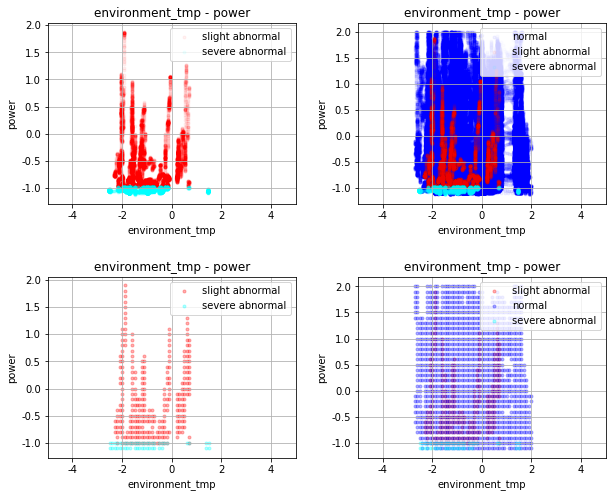

In [44]:
label3_explore_plot(new15fw,'environment_tmp','power',False,0.3,-1,-0.4,1.8,True,-5,5)

354561
436
354561
239
354561
436
354561
1532
354561
239


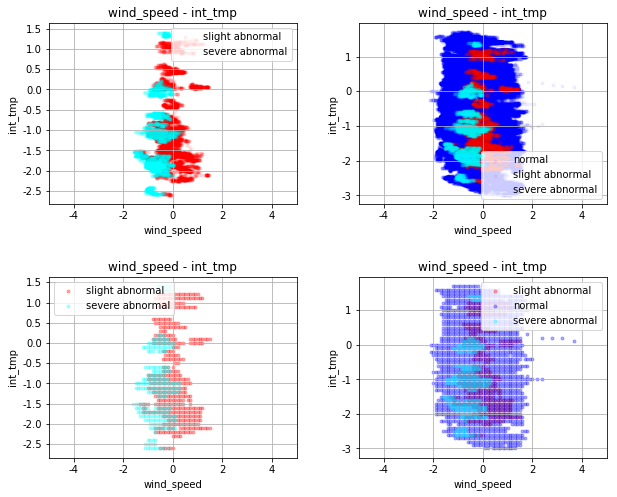

In [45]:
label3_explore_plot(new15fw,'wind_speed','int_tmp',False,0.3,-1,-0.4,1.8,True,-5,5)

### （2）粗略全看

*********************
0 1
354561
142
354561
98
354561
142
354561
647
354561
98


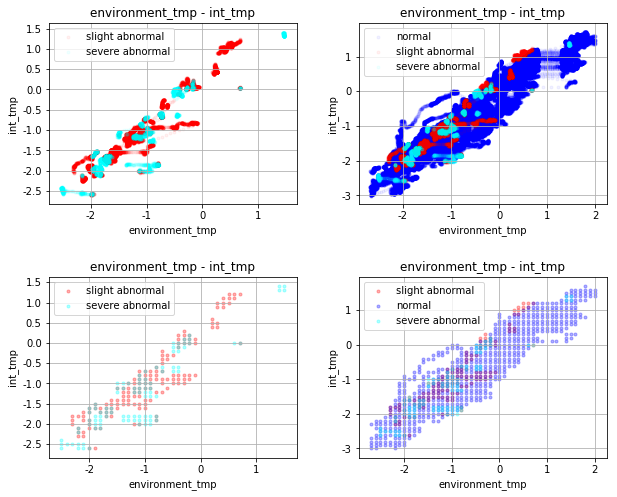

*********************
2 3
354561
223
354561
186
354561
223
354561
700
354561
186


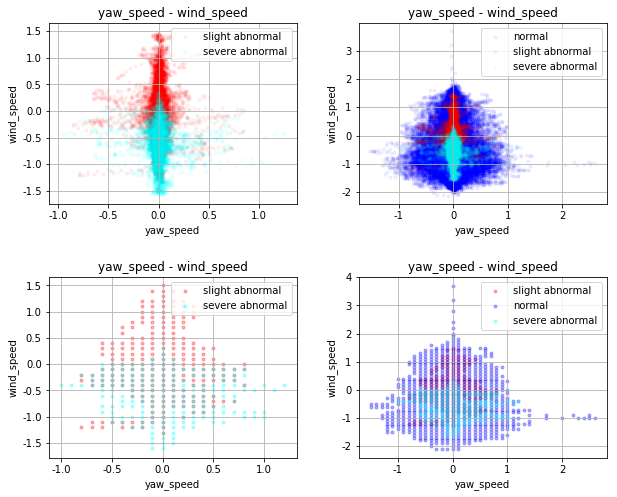

*********************
4 5
354561
54
354561
40
354561
54
354561
121
354561
40


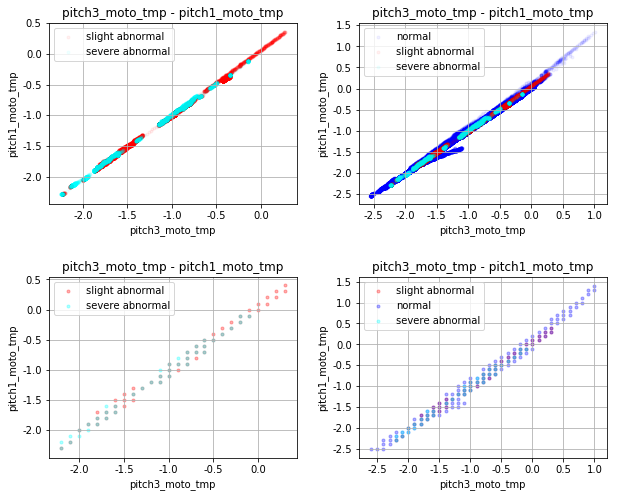

*********************
6 7
354561
230
354561
35
354561
230
354561
851
354561
35


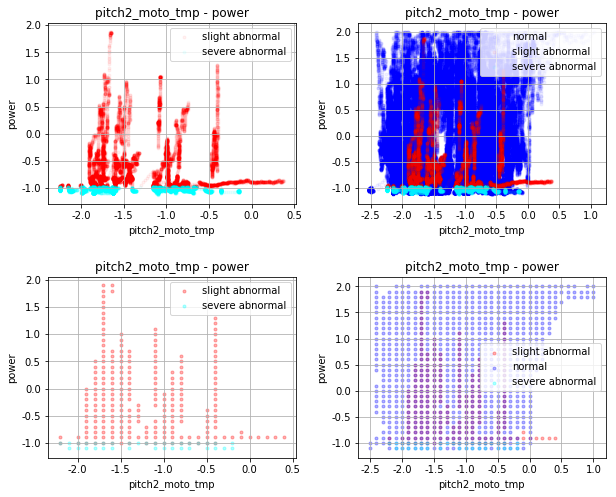

*********************
8 9
354561
7
354561
8
354561
7
354561
37
354561
8


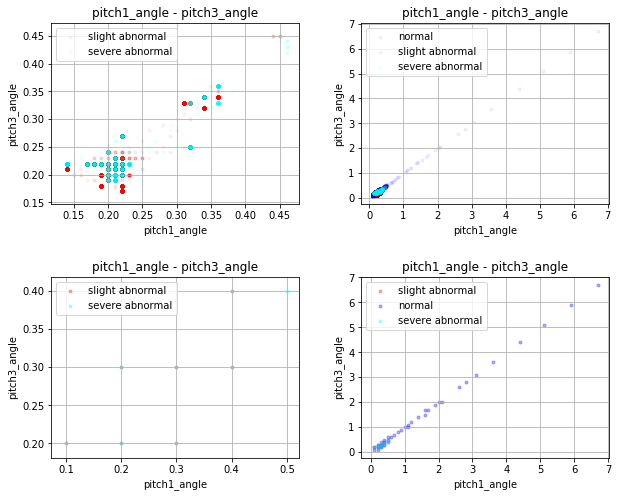

*********************
10 11
354561
50
354561
5
354561
50
354561
151
354561
5


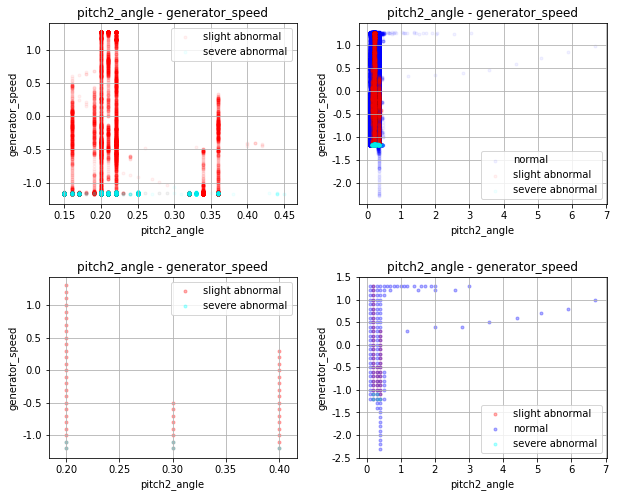

*********************
12 13
354561
2085
354561
44
354561
2085
354561
9081
354561
44


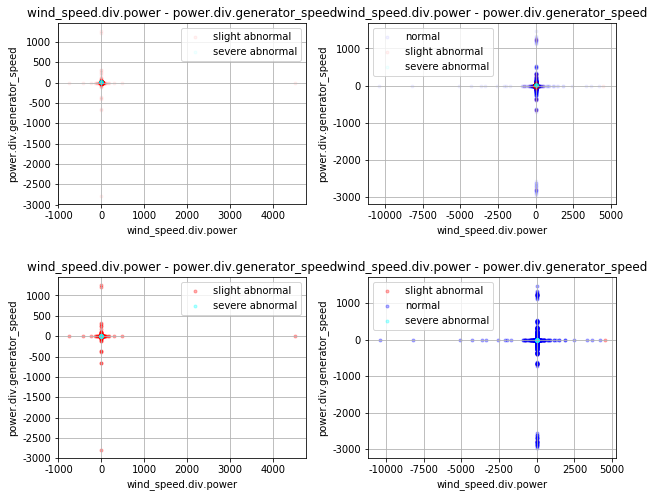

*********************
14 15
354561
1578
354561
595
354561
1578
354561
4386
354561
595


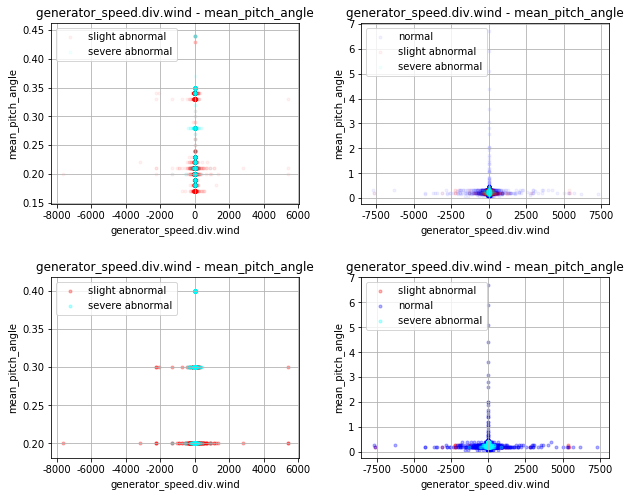

354561
153
354561
110
354561
153
354561
658
354561
110


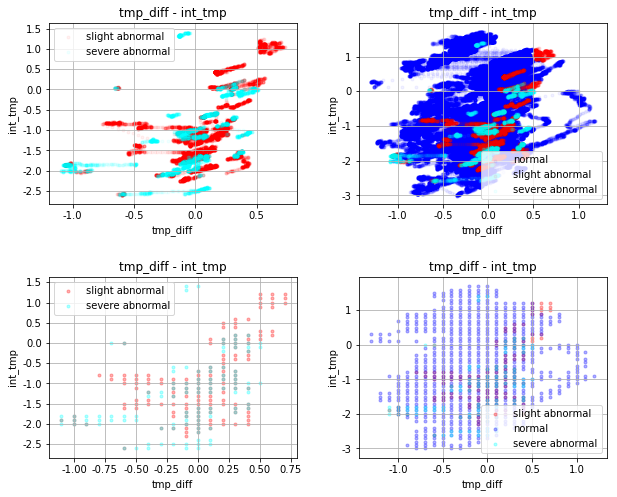

In [46]:
for i in range(1,int(len(feature_use)/2)+1):
    print("*********************")
    print(i*2-2,i*2-1)
    label3_explore_plot(new21=new15fw,feature_x=feature_use[i*2-2],feature_y=feature_use[i*2-1])
label3_explore_plot(new21=new15fw,feature_x=feature_use[16],feature_y=feature_use[1])

# 五 效果

## 1 分别得分：强过滤、确定特征、欠采样、分割条件
先欠采样，再分割

In [47]:
# 强过滤
new15w3 = new15[(new15['power']<=2) & (new15['environment_tmp']<=2)]

In [48]:
# 指定特征
new15fw3 = new15w3[feature_selected + feature_gen+['label']]

In [49]:
# 欠采样
rus = RandomUnderSampler(random_state=0)
X_fw3,y_fw3 = rus.fit_sample(new15fw3.drop(columns=['label']),new15fw3['label'])

In [50]:
# 欠采样之后的数据集
under_fw3 = pd.concat([X_fw3,y_fw3.to_frame()],axis=1)

In [51]:
under_fw3

,environment_tmp,int_tmp,yaw_speed,wind_speed,pitch3_moto_tmp,pitch1_moto_tmp,pitch2_moto_tmp,power,pitch1_angle,pitch3_angle,pitch2_angle,generator_speed,wind_speed.div.power,power.div.generator_speed,generator_speed.div.wind,mean_pitch_angle,tmp_diff,label
0,1.720,1.430,-0.000,-0.970,-0.490,-0.490,-0.500,-0.900,0.100,0.090,0.090,-1.160,1.070,0.780,1.200,0.100,-0.290,0
1,-0.840,-0.860,-0.090,-0.320,-1.570,-1.590,-1.600,-0.480,0.200,0.220,0.210,-0.320,0.670,1.480,1.010,0.210,-0.020,0
2,1.300,0.960,-0.050,-0.620,-0.660,-0.670,-0.670,-0.670,0.350,0.330,0.340,-0.790,0.940,0.840,1.270,0.340,-0.340,0
3,0.160,0.350,0.000,-1.340,-0.680,-0.690,-0.690,-1.040,0.360,0.340,0.360,-1.160,1.290,0.890,0.870,0.350,0.190,0
4,-0.790,-1.050,0.020,-0.130,-1.490,-1.520,-1.530,-0.120,0.200,0.210,0.190,0.310,1.060,-0.390,-2.450,0.200,-0.250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,-1.610,-1.670,-0.010,-0.140,-1.820,-1.860,-1.860,-0.870,0.200,0.200,0.200,-1.160,0.160,0.750,8.520,0.200,-0.060,1
47330,-1.610,-1.670,-0.060,-0.170,-1.820,-1.860,-1.860,-0.870,0.200,0.200,0.200,-1.160,0.200,0.750,6.680,0.200,-0.060,1
47331,-1.610,-1.670,-0.060,-0.140,-1.820,-1.860,-1.860,-0.870,0.200,0.200,0.200,-1.160,0.160,0.750,8.200,0.200,-0.060,1
47332,-1.610,-1.670,-0.070,-0.160,-1.820,-1.860,-1.860,-0.880,0.200,0.200,0.200,-1.160,0.180,0.760,7.250,0.200,-0.060,1


In [52]:
# 分割
svr_ufw3 = under_fw3[under_fw3['power']<=-0.975]
slt_ufw3 = under_fw3[under_fw3['power']>-0.975]

分割后
- 严重结冰这类里，结冰：不结冰=9200：2222
- 轻度结冰这类，结冰：不结冰=14467：21445

不再进行均衡处理

In [53]:
svr_ufw3['label'].value_counts()

1    9214
0    2205
Name: label, dtype: int64

In [54]:
slt_ufw3['label'].value_counts()

0    21462
1    14453
Name: label, dtype: int64

### （1）svr训练测试

In [55]:
X_svr_ufw3,y_svr_ufw3 = svr_ufw3.drop(columns=['label']),svr_ufw3['label']
X_svr_train,X_svr_test,y_svr_train,y_svr_test = train_test_split(X_svr_ufw3,y_svr_ufw3,test_size=0.3,random_state=0)

In [56]:
score_svr = exp(X_svr_train,X_svr_test,y_svr_train,y_svr_test, names, classifiers)

In [57]:
score_svr

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.997,0.997,1.000,0.998,0.993,0.023,0.251
Logistic Regression,0.964,0.974,0.983,0.978,0.933,0.402,0.004
Decision Tree,0.996,0.997,0.998,0.998,0.993,0.062,0.002


### （2）slt训练测试

In [58]:
X_slt_ufw3,y_slt_ufw3 = slt_ufw3.drop(columns=['label']),slt_ufw3['label']
X_slt_train,X_slt_test,y_slt_train,y_slt_test = train_test_split(X_slt_ufw3,y_slt_ufw3,test_size=0.3,random_state=0)

In [59]:
score_slt = exp(X_slt_train,X_slt_test,y_slt_train,y_slt_test, names, classifiers)

In [60]:
score_slt

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.956,0.932,0.960,0.945,0.956,0.084,0.546
Logistic Regression,0.855,0.859,0.766,0.810,0.841,0.541,0.001
Decision Tree,0.996,0.993,0.996,0.994,0.996,0.240,0.003


### （3）作差

In [61]:
score_svr- score_slt

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.042,0.065,0.040,0.053,0.037,-0.061,-0.295
Logistic Regression,0.109,0.115,0.217,0.169,0.093,-0.140,0.003
Decision Tree,0.001,0.004,0.002,0.003,-0.003,-0.178,-0.001


## 2 合并过滤后两个模型的得分

In [62]:
X_svr_train,X_svr_test,y_svr_train,y_svr_test = train_test_split(X_svr_ufw3,y_svr_ufw3,test_size=0.3,random_state=0)
X_slt_train,X_slt_test,y_slt_train,y_slt_test = train_test_split(X_slt_ufw3,y_slt_ufw3,test_size=0.3,random_state=0)

In [63]:
y_svr_ufw3.value_counts()

1    9214
0    2205
Name: label, dtype: int64

In [64]:
y_slt_ufw3.value_counts()

0    21462
1    14453
Name: label, dtype: int64

In [68]:
def cal_2_score(names,classifiers1,classifiers2,X_slt_train,X_slt_test,y_slt_train,y_slt_test,X_svr_train,X_svr_test,y_svr_train,y_svr_test):
    scores = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1-measure','AUC','Train time(s)','Test time(s)'], index=names)
    classifiers_svr = classifiers
    for name, clfsvr, clfslt  in zip(names, classifiers1, classifiers2):
        y_svr_test_df = y_svr_test.to_frame()
        y_slt_test_df = y_slt_test.to_frame()
        time1 = time.time()
        clfsvr.fit(X_svr_train, y_svr_train)
        clfslt.fit(X_slt_train, y_slt_train)
        time2 = time.time()
        y_svr_test_df['y_pred'] = clfsvr.predict(X_svr_test)
        y_slt_test_df['y_pred'] = clfslt.predict(X_slt_test)
        time3 = time.time()
        y_pred = pd.concat([y_svr_test_df,y_slt_test_df])

        scores.at[name,'Accuracy'] = accuracy_score(y_pred['label'], y_pred['y_pred'])
        scores.at[name,'Precision'] = precision_score(y_pred['label'], y_pred['y_pred'])
        scores.at[name,'Recall'] = recall_score(y_pred['label'], y_pred['y_pred'])
        scores.at[name,'F1-measure'] = f1_score(y_pred['label'], y_pred['y_pred'])
        scores.at[name,'AUC'] = roc_auc_score(y_pred['label'], y_pred['y_pred'])

        scores.at[name,'Train time(s)'] = time2 - time1
        scores.at[name,'Test time(s)'] = time3 - time2
    return scores

In [69]:
names = ["Nearest Neighbors",
"Logistic Regression", 
"Decision Tree"
]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression(random_state=0), 
    DecisionTreeClassifier(random_state=0)
]

classifiers2 = [
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression(random_state=0), 
    DecisionTreeClassifier(random_state=0)
]

scores2 = cal_2_score(names,classifiers,classifiers2,X_slt_train,X_slt_test,y_slt_train,y_slt_test,X_svr_train,X_svr_test,y_svr_train,y_svr_test)

In [71]:
scores2

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,0.966,0.957,0.975,0.966,0.966,0.061,0.764
Logistic Regression,0.882,0.906,0.853,0.879,0.882,0.795,0.006
Decision Tree,0.996,0.995,0.997,0.996,0.996,0.267,0.004


In [70]:
scores2 - scoref_under

,Accuracy,Precision,Recall,F1-measure,AUC,Train time(s),Test time(s)
Nearest Neighbors,-0.002,0.002,-0.005,-0.002,-0.002,-0.043,0.112
Logistic Regression,0.027,0.021,0.038,0.030,0.027,-0.494,0.004
Decision Tree,0.001,0.001,0.001,0.001,0.001,-0.026,0.001
